In [71]:
%matplotlib inline

In [72]:
import tensorflow as tf;
import numpy as np;

In [23]:
x = tf.constant([35, 40, 45], name='x');
y = tf.Variable(x+5, name='y');

model = tf.initialize_all_variables();

with tf.Session() as session:
    merged = tf.merge_all_summaries();
    writer = tf.train.SummaryWriter("/tmp/basic", session.graph);
    model = tf.initialize_all_variables();
    session.run(model);
    print(session.run(y));

[40 45 50]


In [21]:
x = np.trunc(np.random.rand(10000) * 1000)
y = tf.Variable(5*x*x - 3*x + 15, name='y');

model = tf.initialize_all_variables();

with tf.Session() as session:
    session.run(model);
    print(session.run(y));

[  1.00219100e+06   2.55399500e+06   2.00789300e+06 ...,   2.61533000e+05
   1.77000000e+02   3.57900000e+03]


In [22]:
x = tf.Variable(0, name='x')

model = tf.initialize_all_variables();

with tf.Session() as session:
    for i in range(5):
        session.run(model);
        x = x + 1;
        print(session.run(x));

1
2
3
4
5


In [31]:
import matplotlib.pyplot as mplt;
import matplotlib.image as mpimg;

(5528, 3685, 3)


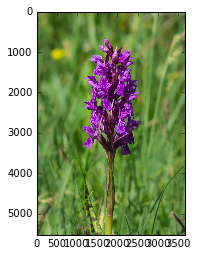

In [35]:
filename = 'MarshOrchid.jpg';
image = mpimg.imread(filename);
height, width, depth = image.shape

print(image.shape);

mplt.imshow(image);
mplt.show();

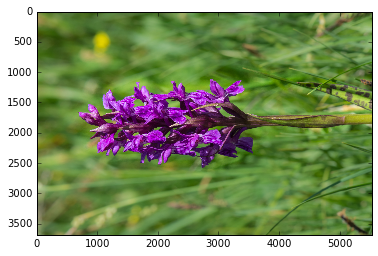

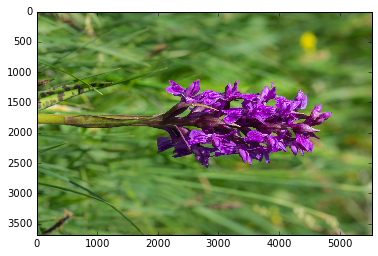

In [45]:
x = tf.Variable(image, name='x');
y = tf.Variable(image, name='y');

model = tf.initialize_all_variables();

with tf.Session() as session:
    x = tf.transpose(x, perm=[1,0,2]);
    y = tf.reverse_sequence(x, [height] * width, 1, batch_dim=0);

    session.run(model);
    trans = session.run(x);
    flipp = session.run(y);

mplt.imshow(result);
mplt.show();

mplt.imshow(flipp);
mplt.show();

In [52]:
x =tf.placeholder('float', None);
y = x * 2;

with tf.Session() as session:
    x_data = [[1,2,3], [4,5,6]];
    result = session.run(y, feed_dict={x: [1,2,3]});
    result_a = session.run(y, feed_dict=({x: x_data}));
    print(result);
    print(result_a);

[ 2.  4.  6.]
[[  2.   4.   6.]
 [  8.  10.  12.]]


(3000, 3685, 3)


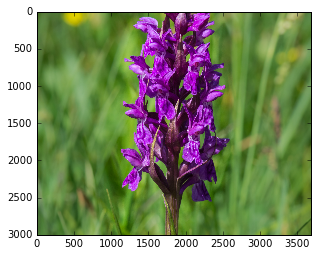

In [53]:
raw_image_data = mpimg.imread(filename);

image = tf.placeholder("uint8", [None,None,3]);
slice = tf.slice(image, [1000,0,0],[3000,-1,-1]);

with tf.Session() as session:
    result = session.run(slice, feed_dict={image:raw_image_data});
    print(result.shape);

mplt.imshow(result);
mplt.show();

In [73]:
import resource;
print("{} Kb".format(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss))

7612866560 Kb


In [70]:
a = tf.add(1, 2, name="Add_two_numbers");
b = tf.mul(a, 3, name="Multiply_by_scalar");
c = tf.add(4, 5, name="Add_two_more_numbers");
d = tf.mul(c, 6, name="Multiply_by_another_scalar");
e = tf.mul(4, 5, name="Multiply_two_numbers");
f = tf.div(c, 6, name="Divide_by_scalar");
g = tf.add(b, d, name="add_two_vectors");
h = tf.mul(g, f, name="multiply_two_vectors");

with tf.Session() as sess:
    writer = tf.train.SummaryWriter("output", sess.graph);
    print(sess.run(h));
    writer.close();

63


In [81]:
def create_samples(num_clusters, num_samples_per_cluster, num_features, embiggen_factor, seed):
    np.random.seed(seed);
    centroids = [];
    slices = [];
    
    for i in range(num_clusters):
        samples = tf.random_normal((num_samples_per_cluster, num_features), mean=0.0, stddev=5.0, dtype=tf.float32, seed=seed, name="cluster_{}".format(i));
        current_centroid = (np.random.random((1, num_features))) * embiggen_factor - (embiggen_factor/2);
        centroids.append(current_centroid);
        
        samples = samples + current_centroid;
        slices.append(samples);

    samples = tf.concat(0, slices, name="samples");
    centroids = tf.concat(0, centroids, name="centroids");
    return centroids, samples;

n_features = 2;
n_clusters = 3;
n_samples_per_cluster = 500;
seed = 700;
embiggen_factor = 70;

np.random.seed(seed);

centroids, samples = create_samples(n_clusters, n_samples_per_luster, n_features, embiggen_factor, seed);

model = tf.initialize_all_variables();
with tf.Session() as session:
    sample_values = session.run(samples);
    centroid_values = session.run(centroids);
    

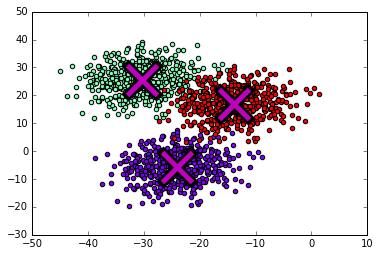

In [83]:
def plot_clusters(all_samples, centroids, num_samples_per_cluster):
    color = mplt.cm.rainbow(np.linspace(0,1,len(centroids)));
    for i, centroid in enumerate(centroids):
        samples = all_samples[i*num_samples_per_cluster:(i+1)*num_samples_per_cluster];
        mplt.scatter(samples[:,0], samples[:,1], c=color[i]);
        
        mplt.plot(centroid[0], centroid[1], markersize=35, marker='x', color='k', mew=10);
        mplt.plot(centroid[0], centroid[1], markersize=30, marker='x', color='m', mew=5);
    mplt.show();   
    
plot_clusters(sample_values, centroid_values, n_samples_per_cluster);

In [ ]:
def choose_random_centroids(samples, num_clusters):
    num_samples = tf.shape(samples)[0];
    